# Textmining

---

Group name: D

---


In [44]:
import pandas as pd 

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [46]:
df=pd.read_csv("~/Documents/GitHub/homework-1/data/raw/webscraping.csv")

In [47]:
df['Text'] = df['Text'].astype(str).str.lower()
df['Title'] = df['Title'].astype(str).str.lower()

df.head()

,Unnamed: 0,Text,Title
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...


In [48]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Text_Token']=df['Text'].apply(regexp.tokenize)
df['Title_Token']=df['Title'].apply(regexp.tokenize)

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh..."


In [49]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords

In [80]:
my_stopwords = ['wired', 'but', 'the']

my_stopwords

['wired', 'but', 'the']

In [81]:
df['Text_Token_1'] = df['Text_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])
df['Title_Token_1'] = df['Title_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1,Text__Token_2,Title_Token_2,Text_Token_2,Text_lem,Title_lem
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[when, roswell, schaeffer, sr, was, 8, years, ...","[mystery, of, alaska, s, disappearing, whales]",roswell schaeffer was years old his father dec...,mystery alaska disappearing whales wired,roswell schaeffer was years old his father dec...,roswell schaeffer was years old his father dec...,mystery alaska disappearing whales wired


In [82]:
df['Text_Token_2'] = df['Text_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))
df['Title_Token_2'] = df['Title_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1,Text__Token_2,Title_Token_2,Text_Token_2,Text_lem,Title_lem
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[when, roswell, schaeffer, sr, was, 8, years, ...","[mystery, of, alaska, s, disappearing, whales]",roswell schaeffer was years old his father dec...,mystery alaska disappearing whales,when roswell schaeffer was years old his fathe...,roswell schaeffer was years old his father dec...,mystery alaska disappearing whales wired


In [83]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [84]:
from nltk.stem import WordNetLemmatizer

In [85]:
wordnet_lem = WordNetLemmatizer()

In [86]:
df['Text_lem'] = df['Text_Token_2'].apply(wordnet_lem.lemmatize)
df['Title_lem'] = df['Title_Token_2'].apply(wordnet_lem.lemmatize)

In [87]:
check_difference = (df['Text_lem'] == df['Text_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [88]:
check_difference = (df['Title_lem'] == df['Title_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [89]:
all_words_articletext = ' '.join([i for i in df['Text_lem']])

In [90]:
all_words_articletitle = ' '.join([i for i in df['Title_lem']])

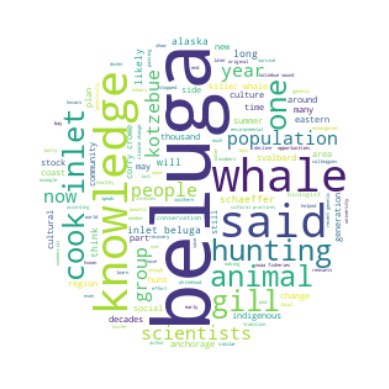

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) **2 + (y - 150) **2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletext)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

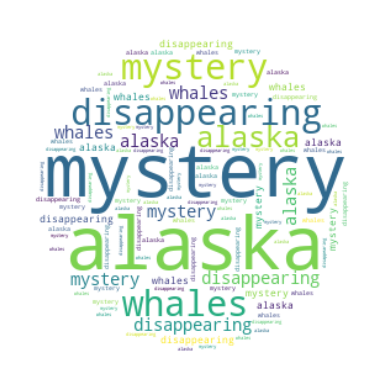

In [92]:
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletitle)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

Ab hier nur noch mit dem Text weitergemacht, da der Titel eine sehr überschaubare Anzahl an Wörtern hat. Kein Wort kommt doppelt vor, das Interessante ist der Artikeltext.

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jakob.desantis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [95]:
words_tokens = nltk.word_tokenize(all_words_articletext)

In [96]:
fd = FreqDist(words_tokens)
fd

FreqDist({'and': 63, 'belugas': 43, 'that': 43, 'whales': 24, 'are': 24, 'they': 22, 'said': 21, 'for': 20, 'from': 19, 'when': 17, ...})

In [97]:
top_4 = fd.most_common(n=4)
top_4

[('and', 63), ('belugas', 43), ('that', 43), ('whales', 24)]

In [98]:
fd.tabulate(4)

    and belugas    that  whales 
     63      43      43      24 


In [99]:
top_10 = fd.most_common(10)

top_10

[('and', 63),
 ('belugas', 43),
 ('that', 43),
 ('whales', 24),
 ('are', 24),
 ('they', 22),
 ('said', 21),
 ('for', 20),
 ('from', 19),
 ('when', 17)]

In [100]:
df_frequence = pd.DataFrame({"frequency": dict(top_10)})

df_frequence

,frequency
and,63
are,24
belugas,43
for,20
from,19
said,21
that,43
they,22
whales,24
when,17


In [101]:
df_frequence.reset_index(inplace=True)

df_frequence

,index,frequency
0,and,63
1,are,24
2,belugas,43
3,for,20
4,from,19
5,said,21
6,that,43
7,they,22
8,whales,24
9,when,17


In [102]:
import altair as alt 
alt.Chart(df_frequence).mark_bar().encode(
    x = alt.X("frequency"),
    y = alt.Y("index", sort = "-x")
)

alt.Chart(...)

In [103]:
fd["belugas"]

43

In [104]:
df.to_csv("~/Documents/GitHub/homework-1/data/processed/textmining-clean.csv")